# Project Overview

In this project I will explore some patterns in the Titanic dataset available at https://www.kaggle.com/c/titanic. The main objective of this piece is to experiment with different functions in python, particularly Numpy and Pandas. In this report, I will present different visualization techniques and in the end, present a classification model.  

First, let's take a look at the data and see how it looks like:


In [2]:
import pandas as pd
titanic = pd.read_csv("C:/Users/sur216/Box Sync/school stuff/Udacity/Data Analyst/p2_titanic/titanic.csv") 

In [3]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Table below provides a description of the titanic variables. It looks like the "Survived" column can be the most potential response variable and many questions can be posed around this variable. Most of the variables are categorical and only two continuous i.e. **"Age"** and **"Fare"**. Additionally, some "NaN" values can be seen throughout the table. 

* **survived** : Survival (0 = No; 1 = Yes)
* **pclass**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* **name**:  Name
* **sex**: Sex
* **age**: Age
* **sibsp**: Number of Siblings/Spouses Aboard
* **parch**: Number of Parents/Children Aboard
* **ticket**: Ticket Number
* **fare**: Passenger Fare
* **cabin**: Cabin
* **embarked**: Port of Embarkation

# Project Question

In this project I intend to answer the following question: ***"what are some of the factors correlating with one's chance of survival?"***

The main objective, however, is to experiment with different python package to showcase how to tackle a typical data analysis question in python. 


# Analysis and Procedure

In this analysis we are going to need **pandas**, **numpy** and **matplotlib** which are common data analysis packages. **seaborn** package highly improves the python plots. **sklearn** is the main machine learning package for python and I am going to use this package and suggest a SVM classifier model. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import Imputer
from scipy.stats import ttest_ind
import warnings

In [5]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

As explained earlier, only two variables are continuous (marked as float64) and the rest are categorical. some of the categorical variables are string and for some python packages these variables need to be converted to integers. 

In [6]:
print 'Only {} passengers survived this accident.Of 891 passengers, {}  of them were women/girls.'.format(len(titanic[titanic['Survived']==1]),len(titanic[titanic['Sex']=="female"]))

Only 342 passengers survived this accident.Of 891 passengers, 314  of them were women/girls.


In [7]:
warnings.filterwarnings("ignore", category=RuntimeWarning) #to avoid the warnings due to NaN
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From this table, we understand that the median fare for this trip was $14.45 and that most of the passengers were in class 3. The age data for 177 passengers is missing. Depending on what we're gonna do with this data we might have different approaches about the missing values. For example, if we wanted to infer something about the Age column alone, we can simply use the dropna() command from the Pandas package. After running the lines below we can see that there is no row that have all it's values marked as NaN. 

In [8]:
print len(titanic.Age.dropna(axis=0, how='any')) # we can see that 714 values from the Age column
print len(titanic.dropna(axis=0, how = 'all')) # there is no row where all the values are NaN

714
891


In [9]:
col_names = ['Embarked','Pclass','Parch','SibSp','Sex','Survived']
for i in col_names:
    print 'The list of uniqe values in column "{}" is: {}'.format(i,titanic[i].unique())
print 'Also, there were {} cabins on this ship.'.format(len(titanic['Cabin'].unique()))

The list of uniqe values in column "Embarked" is: ['S' 'C' 'Q' nan]
The list of uniqe values in column "Pclass" is: [3 1 2]
The list of uniqe values in column "Parch" is: [0 1 2 5 3 4 6]
The list of uniqe values in column "SibSp" is: [1 0 3 4 2 5 8]
The list of uniqe values in column "Sex" is: ['male' 'female']
The list of uniqe values in column "Survived" is: [0 1]
Also, there were 148 cabins on this ship.


By running the loop above we get the unique values for the important categorical variables in our dataset. We know understand that the ship has stopped by three  ports (i.e. S,C and Q). There were three classes of tickets and 148 cabins on the ship. We also get a sense of how large the families were.  

There seems to be some nan values in **Embarked** as well. We first check how many of them are there. It looks like there are only two. We can go ahead and print these two rows. We can see that the ticket numbers are the same (probably bought together). 

In [10]:
print len(titanic.Embarked.dropna(axis = 0, how = 'any')) # 'Embarked' column seems to have two NaN values 
print titanic[titanic.Embarked.isin(['S','C','Q'])==False] # and here are the rows with missing v

889
     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


We now check for cabins and we can see that information on 204 cabins is missing. We make a histogram of these rows and we can see that most of them were class 3. 

In [11]:
print len(titanic.Cabin.dropna(axis = 0, how = 'any'))
b = titanic[titanic.Cabin.isnull()]['Pclass']

204


We can check to see how many rows have all the data for both cabin and age available. By running the lines below we can see that 158 have neither available while only 185 have both of them. 

In [12]:
print len(titanic[titanic.Age.isnull() & titanic.Cabin.isnull()]) #those with both Cabin and Age marked as NaN
print len(titanic[titanic.Age.notnull() & titanic.Cabin.notnull()]) #those which we have data on both Age and Cabin

158
185


In this analysis I will focus on the some major factos so in here we don't care about cabins it's ok if they're Null. we do care about Age and Pclass, however. therefore, we simply remove those rows which have eithe rof these missing. 

In [13]:
titanic = titanic[titanic.Age.notnull() & titanic.Pclass.notnull()] 

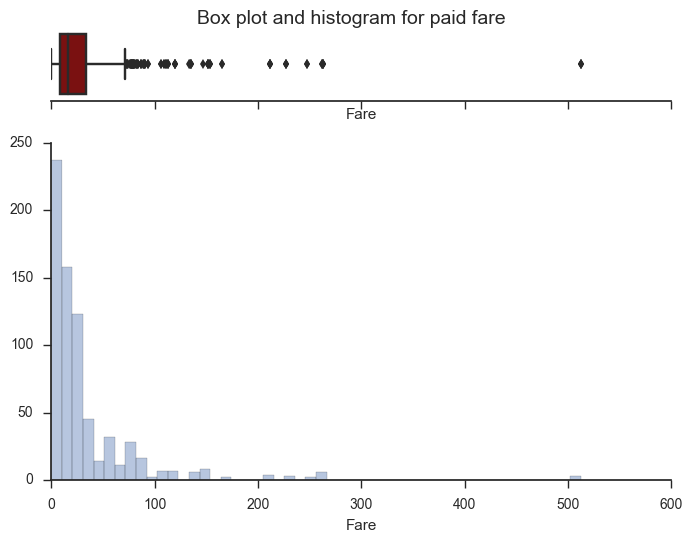

In [15]:
# check out the distribution of numerical variables
%matplotlib inline
x = titanic['Fare']
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 0.9)} )
sns.boxplot(x, ax=ax_box, color = '#8B0000')
sns.distplot(x, ax=ax_hist,kde=False)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.subplots_adjust(top=0.95)
f.suptitle('Box plot and histogram for paid fare',fontsize = 14)

This historgram shows that most of the number of people who has paid low fare to get on the ship was extremely larger nd most of them were as low as 10 to 20 dollars. 

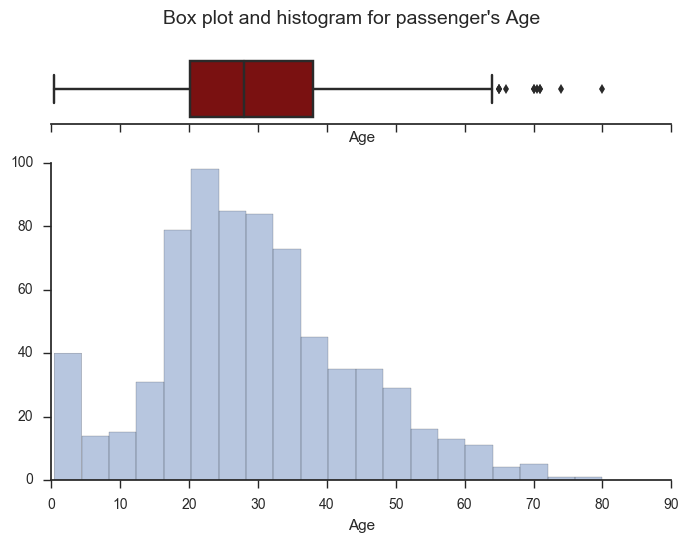

In [502]:
y = titanic['Age']
y = y[np.isfinite(y)]
sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 0.9)} )
sns.boxplot(y, ax=ax_box, color = '#8B0000')
sns.distplot(y, ax=ax_hist,kde=False)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.subplots_adjust(top=0.9)
f.suptitle("Box plot and histogram for passenger's Age",fontsize = 14)

In the plot below I use **FacetGrid** barplots to check the effect of multiple factors at the same time. **FacetGrid** is a module in **seaborn** library and can be applied to different graphs. The boxplots below show that most of the males in the class 1 and class 2 were survived, the color is indicator of the family size which I made by adding *SibSp* and *Parch*. All the males in the large families in class 1 and 2 were survived. In the class 3 section, females have had a better chance of surviving. Males who had the 3rd class tickets experienced the highest rates of deaths. We can also see that family size appears to be an important factor. The larger family size the higher chance of survival, in general. 

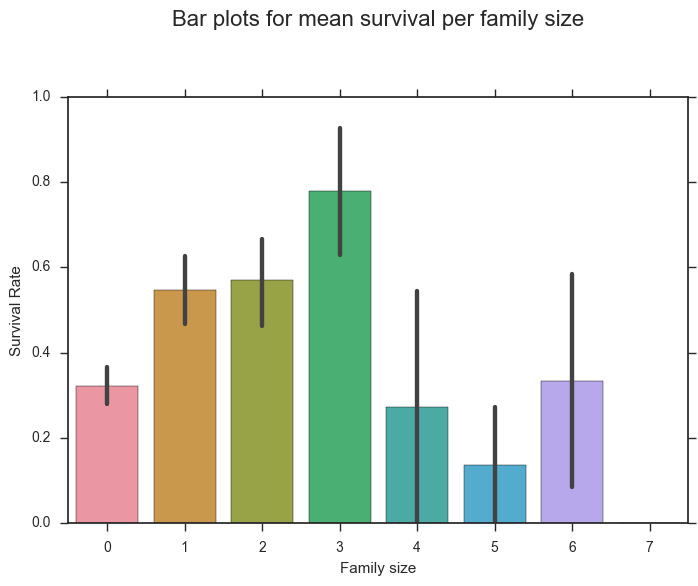

In [21]:
titanic['Family size'] = titanic["SibSp"]+titanic["Parch"]
ax  = sns.barplot(x="Family size", y="Survived", data=titanic)
ax.set(ylabel='Survival Rate')
plt.title('Bar plots for mean survival per family size', horizontalalignment='center',y=1.15,fontsize = 16)

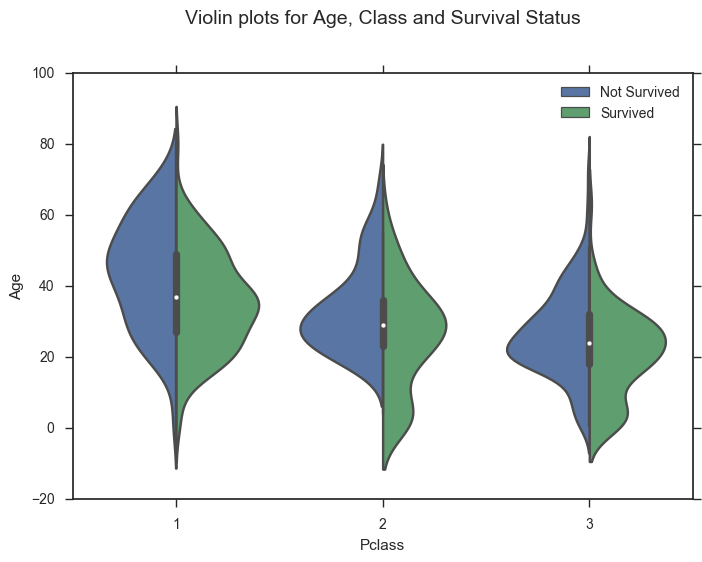

In [34]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=titanic, split=True)
plt.title('Violin plots for Age, Class and Survival Status', horizontalalignment='center',y=1.1,fontsize = 14)
L= plt.legend()
L.get_texts()[0].set_text('Not Survived')
L.get_texts()[1].set_text('Survived');

The **violinplot** enables us to simultaneously study both continuous and categorical variables. For example, in the plot above, we can see that older people in the class 1 had lower chance of survival than youngers. the median age for survived in class 1 is around 30 and for unsurvived it's more than 40. in both class 2 and 3 we can see a bump on the lower end of the survived groups (i.e. color green) these bumps represent the younger ages meaning that in both class 2 and 3 a good number of children were survived. most of the unsurvived in class 2 and 3 were around 20-30 years old. 

In [17]:
def stat_var(variable_list):
        a = titanic.groupby(variable_list,as_index=True).mean().iloc[:,1:9]
        b = titanic.groupby(variable_list,as_index=True).median().iloc[:,1:9]
        d = titanic.groupby(variable_list,as_index=True)
        c = d.count().PassengerId
        return a,b,c

mean,median,count = stat_var(['Sex']) 
print mean,"\n"*3, median, "\n"*3, count

mean,median,count = stat_var(['Survived']) 
print mean,"\n"*3, median, "\n"*3, count
    
mean,median,count = stat_var(['Survived','Sex'])
print mean,"\n"*3, median, "\n"*3, count

mean,median,count = stat_var(['Survived','Pclass'])
print mean,"\n"*3, median, "\n"*3, count


        Survived    Pclass        Age     SibSp     Parch       Fare
Sex                                                                 
female  0.754789  2.065134  27.915709  0.639847  0.708812  47.582759
male    0.205298  2.335541  30.726645  0.439294  0.271523  27.268836 


        Survived  Pclass   Age  SibSp  Parch  Fare
Sex                                               
female         1       2  27.0      0      0  26.0
male           0       3  29.0      0      0  13.0 


Sex
female    261
male      453
Name: PassengerId, dtype: int64
            Pclass        Age     SibSp     Parch       Fare
Survived                                                    
0         2.485849  30.626179  0.525943  0.365566  22.965456
1         1.872414  28.343690  0.493103  0.527586  51.843205 


          Pclass   Age  SibSp  Parch     Fare
Survived                                     
0              3  28.0      0      0  11.8875
1              2  28.0      0      0  26.2500 


Survived
0    42

According to the tables printed above, females chance of survival was more than males by almost three times. Although, it should be noted that the median passenger class for female passengers were 2 and for men was 3. The median paid fare for females was twice as much for males. This suggests that females were generally located in better parts of the ship. as we separated the data by "survived" (i.e. **mean,median,count = stat_var(['Survived'])**) we can see some other interesting patterns. For example, Thos who had parents or childrens with the have had a better chance of survival. Generally, 360 male passengers died and only 93 were survived while most of the female passengers survived (197 survivals vs. 64 deaths). Generally, younger people in either class 1,2 or 3 had better chances of survival. In general, 270 passengers in class 3 died and only 85 survived. 63% of the deaths of the entire accident was among the class 3 pssengers. 

We can now run a t-test to see if gender was indeed an influential factor in one's survival. As we can see, the P value is almost zero and the t score is high. It looks like gender has been an important factor in one's chance of survival. 

In [18]:
sur_fem = titanic[titanic.Sex == "female"]
sur_mal = titanic[titanic.Sex == "male"]
sur_fem.head()
print "P-Value:",ttest_ind(sur_fem.Survived,sur_mal.Survived)[1],"\n","T score:",ttest_ind(sur_fem.Survived,sur_mal.Survived)[0];


P-Value: 5.2247099268e-55 
T score: 17.0671463693


In the next step, I will make two new variables which are the categorical versions of **Age** and **Fare**. To do this, we first find the max, min and standard deviation of each variable to see how many groups would fit these variables. For example, we can see that the olderst person on the ship was 80 and the youngest was 0.42. We can also see that the standard deviation is 14.5 years. It looks like age groups of length 10 is reasonable for this variable. With the same strategy, I will divide the **Fare** variable to 10 groups of length 50. we will next make the same plot but this time we use **AgeGroup** instead of **Age**. 

In [23]:
#for the ease of visualization we know convert the two numerical variables to categorical variables
# convert "Age" to multiple age groups of length 10 
print (max(titanic["Age"]), min(titanic["Age"]),np.std(titanic["Age"]))

labels = [ "{0} - {1}".format(i, i + 9) for i in range(0, 70, 10) ]
titanic['AgeGroup'] = pd.cut(titanic["Age"], range(0, 80, 10), right=False, labels=labels)

# convert "Fare" to multiple groups of length 50
print (max(titanic["Fare"]), min(titanic["Fare"]), np.std(titanic["Fare"]))
labels = [ "{0} - {1}".format(i, i + 49) for i in range(0, 465, 50) ]
titanic['FareGroup'] = pd.cut(titanic["Fare"], range(0, 515, 50), right=False, labels=labels)

(80.0, 0.41999999999999998, 14.516321150817317)
(512.32920000000001, 0.0, 52.881858444051744)


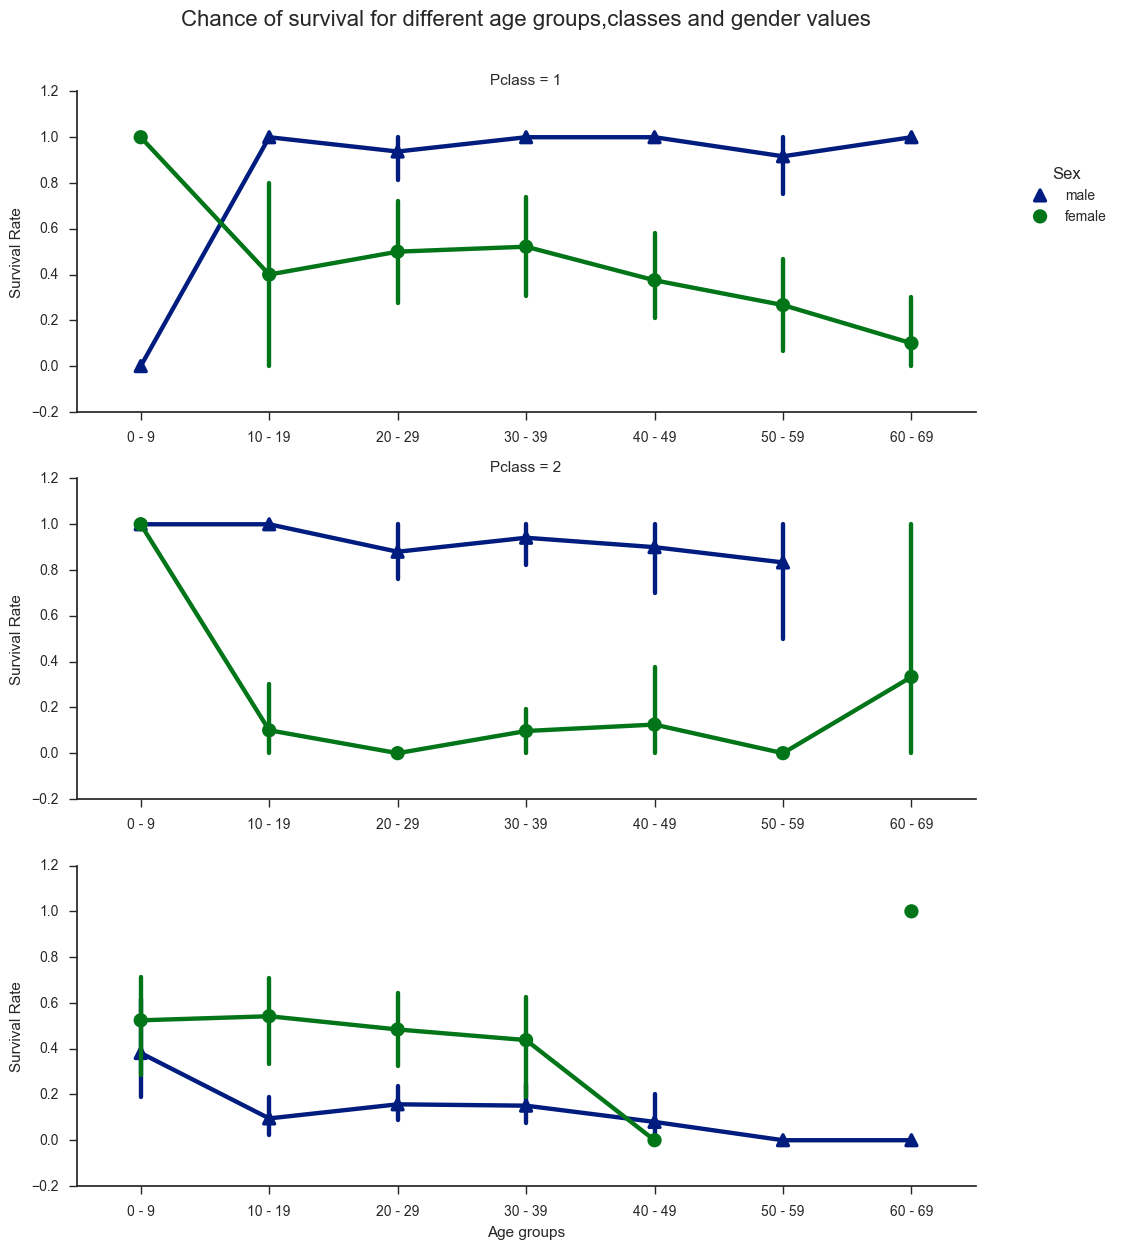

In [24]:
f = sns.FacetGrid(titanic, row="Pclass", size=4, aspect=7, sharex=False,
                  gridspec_kws={"height_ratios":[1,1,1],"width_ratios": [10, 10, 10]})

f.map(sns.pointplot, "AgeGroup", "Survived", "Sex", palette="dark", npalette={'male': 'g', 'female': 'm'},markers=["^", "o"])
f.set_ylabels("Survival Rate")
f.set_xlabels("Age groups")
plt.legend(bbox_to_anchor=(1.05, 3.2), loc=2, borderaxespad=0.,title = "Sex")
plt.title("Chance of survival for different age groups,classes and gender values", horizontalalignment='center',y=3.6,fontsize = 16);

The plot is more interpretable now. As you can see the division between men and women survived in class 2 is the highest. Again, we can see that most of the men in class 3 did not survive. In class 3 young girls had the highest chance of being survived while in both class 1 and 2 all men between 30 and 39 were survived. 

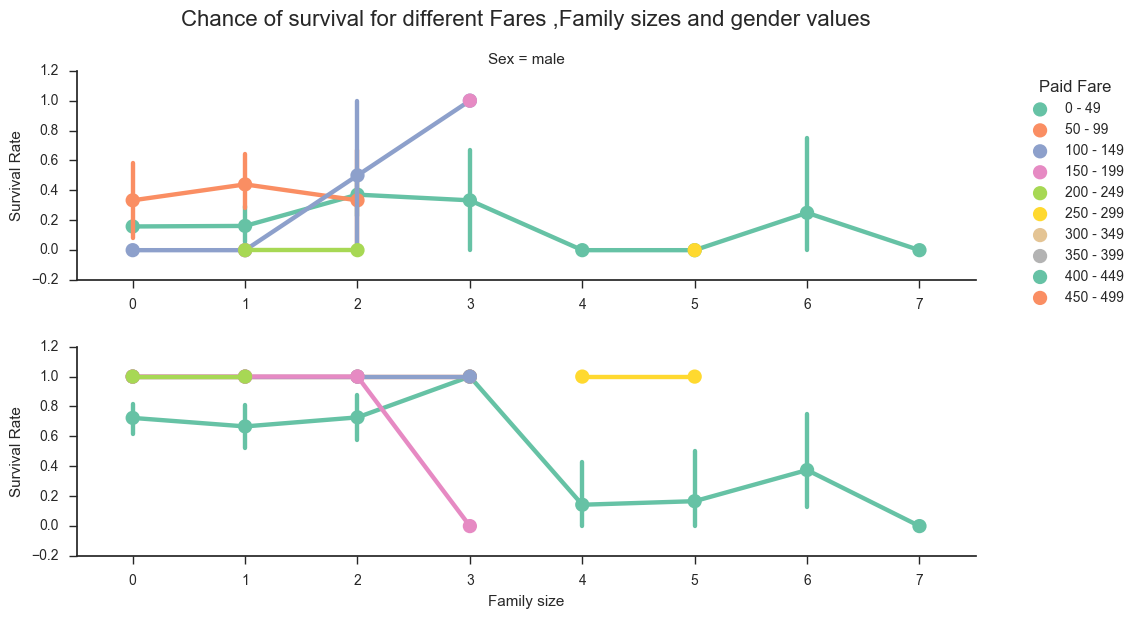

In [25]:

f = sns.FacetGrid(titanic, row="Sex", size=4, aspect=7, sharex=False,
                  gridspec_kws={"height_ratios":[1,1,1],"width_ratios": [10, 10, 10]})
f.map(sns.pointplot,"Family size" , "Survived", "FareGroup", palette = sns.color_palette("Set2", 10))
f.set_ylabels("Survival Rate")
plt.legend(bbox_to_anchor=(1.05, 2.3), loc=2, borderaxespad=0.,title = "Paid Fare")
plt.title("Chance of survival for different Fares ,Family sizes and gender values", horizontalalignment='center',y=2.5,fontsize = 16);

We make the same type of graph once more but this time we use **FareGroup** instead of AgeGroup. We can see that within the 0-49 fare group the chance of survival for females in larger family size we less than those with smaller family size. Recall that the majority of the passengers had paid less than 50. The optimum family size for both men and women in this group is 2-3 members. Also, we can see that most of those passengers who have paid more than $50 for ticket, have also had small family sizes. Females who paid more than 50 have had a good chance of survival. 

In the section below, I suggest a SVM classifer for this dataset. SVM (o.e. Support Vector Machine) is one of the most common classification methods. Since I intend to visualize different SVM models with different kernels, I will only use 2 variables that I found to be influential in th eprevious steps. These two variables are **Fare** and **Age**. However, if I run the model with these two it will take hours simply because there are too many unique quantities for these two variables. To remedy this, I will use **AgeGroup** and **FareGroup** instead. My purpose here is not to provide an accurate classification model, but it's rather about going through a typical classification process. A better idea would have been to find the principal components first and choose the first two, to get more accurate results but I will skip this step.

Recall that AgeGroup and FareGroup were objects and not integer. SVM only accepts floats and integers as input. Therefore, I will first code these two variables and convert them to integers. 

In [26]:
#convert string categories to numerical
titanic['AgeGroup'] = titanic['AgeGroup'].astype('category')
titanic['FareGroup']= titanic['FareGroup'].astype('category')
titanic['AgeGroup_2'] =  titanic.AgeGroup.cat.codes
titanic['FareGroup_2'] =  titanic.FareGroup.cat.codes
titanic.head()
x_titanic = titanic.iloc[:, [15,16]] #selecting variables for the classification tree
x_titanic = x_titanic.apply(lambda x: pd.to_numeric(x, errors='coerce')) #convert predictors to numeric
y_titanic = pd.to_numeric(titanic.iloc[:,1], errors='coerce') #convert response to numeric
x_titanic.head()

,AgeGroup_2,FareGroup_2
0,2,0
1,3,1
2,2,0
3,3,1
4,3,0


The methods used in this section is mostly adopted from here: http://scikit-learn.org/stable/modules/svm.html
I first used imputer to get rid of the NaN variables and then divided the dataset into a train set (80% of the data) and test set. I fit four SVM models with different methods and apply the resulting models to the test set and see which one give more accurate results. 

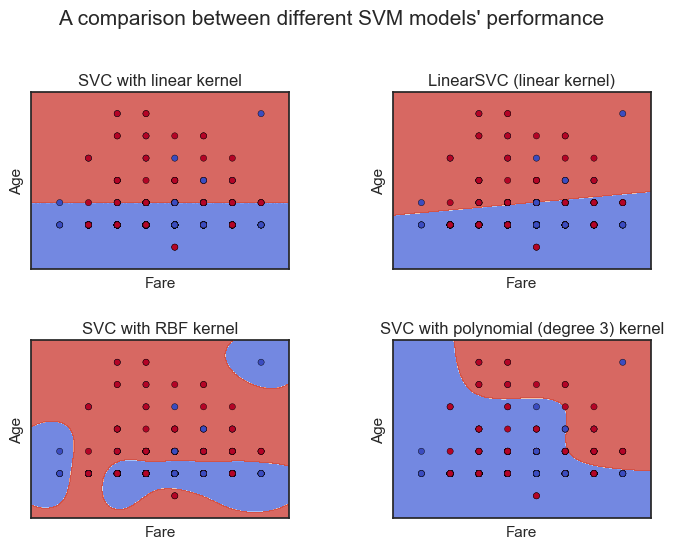

In [33]:
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) # to avoid the warning which is caused by the new version of numpy
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
x_t = imp.fit_transform(x_titanic)

np.random.seed(1)
rnd_sample = np.random.rand(len(x_t)) < 0.8
x = x_t[rnd_sample]
x_test = x_t[~rnd_sample]
y = y_titanic[rnd_sample]
y_test = y_titanic[~rnd_sample]

h=0.02
C=1.0

svc = svm.SVC(kernel='linear', C=C).fit(x, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x, y)
poly_svc = svm.SVC(kernel='poly', degree=4, C=C).fit(x, y)
lin_svc = svm.LinearSVC(C=C).fit(x, y)

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Fare')
    plt.ylabel('Age')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.suptitle("A comparison between different SVM models' performance", y= 1.05, fontsize = 15)


In [514]:
pd.crosstab(y_test, poly_svc.predict(x_test))

col_0,0,1
Survived,,
0,81,4
1,51,6


In [515]:
pd.crosstab(y_test, rbf_svc.predict(x_test))

col_0,0,1
Survived,,
0,73,12
1,32,25


In [516]:
pd.crosstab(y_test, svc.predict(x_test))

col_0,0,1
Survived,,
0,78,7
1,41,16


In [517]:
pd.crosstab(y_test, lin_svc.predict(x_test))

col_0,0,1
Survived,,
0,82,3
1,47,10


In this particular case it looks like RBF kernel is more accurate than all other models. The accuracy of classification for the RBF kernel SVM is roughly 69%.  

# Conclusion

In this write up I examined different methods to discover which factors were influencial in one's chance of survival in the titanic accident. In this project, I did not test for staitical significance of different variables, but rather tried too find some trends and patterns via a mostly visual EDA. We found out that passenger class, sex, fare and age were all influential factors in different ways. In the end, I tried an SVM classifier by incorporating only two variables (i.e. Fare and Age) and the model was capable of predicting the chance of survival by 69% accuracy. We found out that young Single Males or thoses with small family size had lower chance of survival in class 3 section while for class 1 and 2 males had a better chance of survival. We also realized that family size was an important factor. those with large family sizes, either male or female had better chances of survival. Overall, Class 3 have experienced more deaths compared to the two classes, obviously the security measures in class three have been dramatically lower than the two.

# limitations and suggestions

While we analyzed the importance of some general factors, many influential factors are missing from this dataset. for example, the position of cabins in relation to the hole in the ship, number of peopl ein each cabin, where each person were at the time of accident, and the family ties between the passenger IDs. Also there were a number of rows with missing data.For future work, I suggest trying some of the well-known classification methods such as logistic regressions and decision trees to find to what extent each factor were important in one's survival. 
